Purpose: Run the final principal component analyses for all datasets used in analyses (as of July 24, 2023).<br>
Author: Anna Pardo<br>
Date initiated: July 24, 2023

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

In [3]:
# load TPM matrix
tpm = pd.read_csv("../../data/rawtpm_bptreat_noPEG.tsv",sep="\t",header="infer")
tpm.head()

KeyboardInterrupt: 

In [3]:
len(tpm["Sample"].unique())

1981

In [4]:
# define a function from an answer in https://stackoverflow.com/questions/39812885/retain-feature-names-after-scikit-feature-selection
def variance_threshold_selector(data):
    selector = VarianceThreshold()
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [5]:
# set Sample as index and drop BioProject and Treatment columns
ttpm = tpm.set_index("Sample").drop(["BioProject","Treatment"],axis=1)
ttpm.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,0.409268,0.0,1.122904,0.0,...,0.171184,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000
SRR11933272,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,0.170305,0.0,2.280915,0.0,...,0.108052,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000
SRR11933250,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,0.000000,0.0,1.908468,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349
SRR11933029,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,0.000000,0.0,1.619452,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075
SRR11933040,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,0.143764,0.0,2.264390,0.0,...,0.178304,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959


In [6]:
# put through VarianceThreshold() using the variance_threshold_selector() defined above
vttpm = variance_threshold_selector(ttpm)
vttpm.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,0.409268,0.0,1.122904,0.0,...,0.171184,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000
SRR11933272,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,0.170305,0.0,2.280915,0.0,...,0.108052,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000
SRR11933250,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,0.000000,0.0,1.908468,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349
SRR11933029,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,0.000000,0.0,1.619452,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075
SRR11933040,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,0.143764,0.0,2.264390,0.0,...,0.178304,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959


In [7]:
# find how many zero-variance genes were eliminated
len(ttpm.columns)-len(vttpm.columns)

9

In [8]:
# log-transform TPM
vttpm_log = vttpm.apply(lambda x: np.log2(x+1))
vttpm_log.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,3.760627,1.731651,0.060075,3.800400,2.644723,3.597631,0.494946,0.0,1.086039,0.0,...,0.227968,0.000000,0.0,0.0,0.0,0.389017,0.0,0.000000,0.0,0.000000
SRR11933272,4.109013,2.039269,0.490802,3.038092,1.537277,1.742518,0.226885,0.0,1.714098,0.0,...,0.148026,0.173611,0.0,0.0,0.0,2.945473,0.0,0.000000,0.0,0.000000
SRR11933250,3.326079,1.994391,0.000000,2.032962,1.842599,4.103174,0.000000,0.0,1.540259,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.503415,0.0,0.326679,0.0,1.146231
SRR11933029,3.201844,1.759475,0.000000,1.447213,1.549133,4.364607,0.000000,0.0,1.389265,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.244933
SRR11933040,3.507319,1.925657,0.000000,1.189432,2.254362,4.372791,0.193789,0.0,1.706813,0.0,...,0.236712,0.017435,0.0,0.0,0.0,3.409421,0.0,0.000000,0.0,1.745435


In [9]:
# run PCA and generate dataframe with PCs
pca = PCA(n_components=2)
real_PCs = pca.fit_transform(vttpm_log)
real_PCs_df = pd.DataFrame(data = real_PCs, columns = ['PC1','PC2'])

In [10]:
# find the explained variance ratio
pca.explained_variance_ratio_

array([0.27665469, 0.14931956])

In [11]:
## reset index (after running PCA)
vttpm_log.reset_index(inplace=True)
vttpm_log.rename(columns={"index":"Sample"},inplace=True)
vttpm_log.head()

,Sample,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR11933261,3.760627,1.731651,0.060075,3.800400,2.644723,3.597631,0.494946,0.0,1.086039,...,0.227968,0.000000,0.0,0.0,0.0,0.389017,0.0,0.000000,0.0,0.000000
1,SRR11933272,4.109013,2.039269,0.490802,3.038092,1.537277,1.742518,0.226885,0.0,1.714098,...,0.148026,0.173611,0.0,0.0,0.0,2.945473,0.0,0.000000,0.0,0.000000
2,SRR11933250,3.326079,1.994391,0.000000,2.032962,1.842599,4.103174,0.000000,0.0,1.540259,...,0.000000,0.000000,0.0,0.0,0.0,0.503415,0.0,0.326679,0.0,1.146231
3,SRR11933029,3.201844,1.759475,0.000000,1.447213,1.549133,4.364607,0.000000,0.0,1.389265,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.244933
4,SRR11933040,3.507319,1.925657,0.000000,1.189432,2.254362,4.372791,0.193789,0.0,1.706813,...,0.236712,0.017435,0.0,0.0,0.0,3.409421,0.0,0.000000,0.0,1.745435


In [12]:
# Load metadata
md = pd.read_csv("../../data/metadata_corrected_14-Feb-2024.csv",sep=",",header="infer")
md.head()

,Unnamed: 0,BioProject,Sample,sample_name,Replicate_num,Genotype,Technology,Library_layout,Treatment,Duration_hours,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,0,PRJNA637522,SRR11933261,238_WS2,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,312.0,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
1,1,PRJNA637522,SRR11933272,238_WS1,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,216.0,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
2,2,PRJNA637522,SRR11933250,268_WS1,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,216.0,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
3,3,PRJNA637522,SRR11933029,268_WW,NaN,268,Illumina HiSeq 2500,PAIRED,Control,216.0,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
4,4,PRJNA637522,SRR11933040,268_WS2,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,312.0,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN


In [13]:
# merge with metadata
## note this has to maintain the sample order of vttpm_log, otherwise when we concatenate it with the PC df everything will be
## incorrectly matched up
vttpm_log_merged = vttpm_log.merge(md,how="inner")
vttpm_log_merged.head()

,Sample,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,SRR11933261,3.760627,1.731651,0.060075,3.800400,2.644723,3.597631,0.494946,0.0,1.086039,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
1,SRR11933272,4.109013,2.039269,0.490802,3.038092,1.537277,1.742518,0.226885,0.0,1.714098,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
2,SRR11933250,3.326079,1.994391,0.000000,2.032962,1.842599,4.103174,0.000000,0.0,1.540259,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
3,SRR11933029,3.201844,1.759475,0.000000,1.447213,1.549133,4.364607,0.000000,0.0,1.389265,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
4,SRR11933040,3.507319,1.925657,0.000000,1.189432,2.254362,4.372791,0.193789,0.0,1.706813,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN


In [14]:
# append metadata to PCA df
plotdf = pd.concat([real_PCs_df,vttpm_log_merged[["BioProject","Genotype","Treatment","Time_after_treatment","Duration_hours",
                                                  "Concentration","Developmental_stage","Tissue","Day_length_hours","Day_temp_C",
                                                  "Night_temp_C","Relative humidity (%)","Light (umol/m2/s)","Growth Env.",
                                                  "Media"]]],axis=1)
plotdf.head()

,PC1,PC2,BioProject,Genotype,Treatment,Time_after_treatment,Duration_hours,Concentration,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media
0,11.135183,-111.714054,PRJNA637522,238,Drought,13 days,312.0,NaN,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN
1,-38.992405,-70.580545,PRJNA637522,238,Drought,9 days,216.0,NaN,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN
2,-3.060214,-100.609446,PRJNA637522,268,Drought,9 days,216.0,NaN,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN
3,-36.094265,-86.905344,PRJNA637522,268,Control,9 days,216.0,NaN,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN
4,-7.699646,-92.940793,PRJNA637522,268,Drought,13 days,312.0,NaN,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN


In [15]:
# rename DroughtRepeat to Drought
plotdf["Treatment"].mask(plotdf["Treatment"]=="DroughtRepeat","Drought",inplace=True)

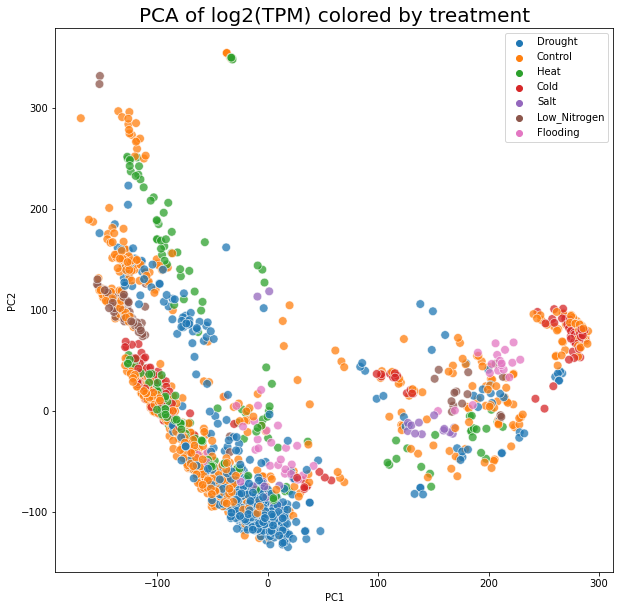

In [16]:
# plot the data: to start with, color by treatment
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Treatment"],palette="tab10",s=75,alpha=0.75)
plt.title("PCA of log2(TPM) colored by treatment",fontsize=20)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("../../figures/PCA/24-Jul-2023_UsedData_byTreatment.svg",bbox_inches="tight")

In [17]:
# I will attempt to plot two overlapping scatterplots with different colormaps to accommodate all 40 BioProjects
# generate a list containing half of the BioProjects

half_bioprojects = []
count = 0
while count < 20:
    half_bioprojects.append(plotdf["BioProject"].unique()[count])
    count += 1

In [18]:
# generate dataframes each containing half the BioProjects
plotdf1 = plotdf[plotdf["BioProject"].isin(half_bioprojects)]
plotdf2 = plotdf[~plotdf["BioProject"].isin(half_bioprojects)]

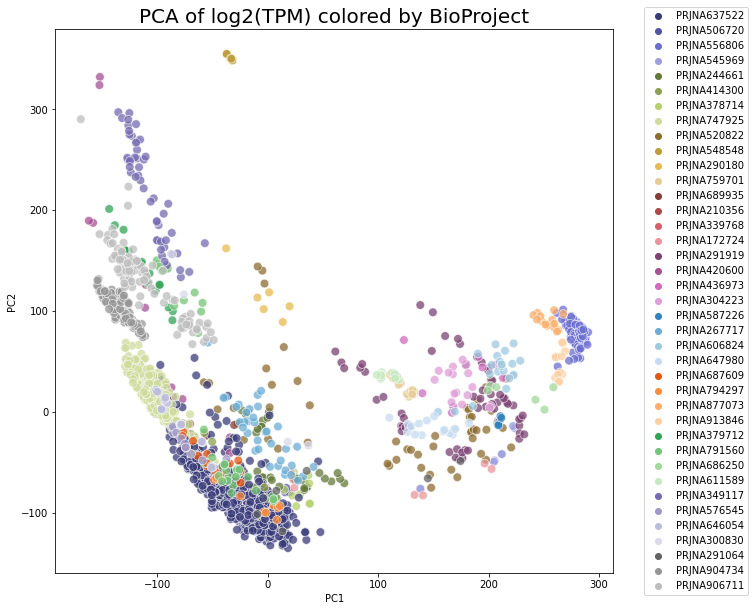

In [20]:
# plot data by BioProject
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf1["PC1"],y=plotdf1["PC2"],hue=plotdf1["BioProject"],palette="tab20b",s=75,alpha=0.75)
sns.scatterplot(x=plotdf2["PC1"],y=plotdf2["PC2"],hue=plotdf2["BioProject"],palette="tab20c",s=75,alpha=0.75)
plt.title("PCA of log2(TPM) colored by BioProject",fontsize=20)
plt.legend(bbox_to_anchor=(1.25,1.05))
plt.savefig("../../figures/PCA/24-Jul-2023_UsedData_byBioProject.svg",bbox_inches="tight")

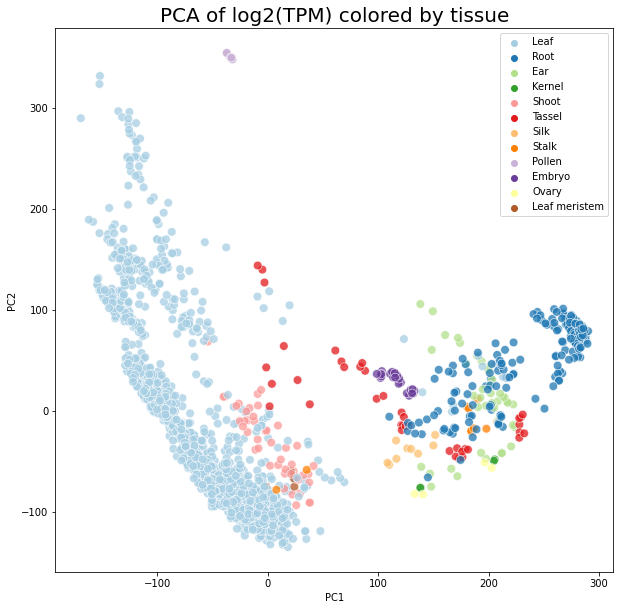

In [21]:
# plot data by tissue
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Tissue"],palette="Paired",s=75,alpha=0.75)
plt.title("PCA of log2(TPM) colored by tissue",fontsize=20)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("../../figures/PCA/24-Jul-2023_UsedData_byTissue.svg",bbox_inches="tight")

In [ ]:
# plot by growth environment
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Growth Env."],palette="Set1",s=75,alpha=0.75)
plt.title("PCA of log2(TPM) colored by growth environment",fontsize=20)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("../../figures/PCA/24-Jul-2023_UsedData_byGrowthEnv.svg",bbox_inches="tight")

In [ ]:
# generate a dictionary in which the keys are developmental stages from the metadata and values indicate Vegetative or 
## Reproductive

devstage = {}
for d in plotdf["Developmental_stage"].unique():
    if type(d)==str:
        if d.startswith("V"):
            if d != "VT":
                devstage[d] = "Vegetative"
        elif "poll" in d:
            devstage[d] = "Reproductive"
        elif d=="4 days after sowing":
            devstage[d] = "Vegetative"
        elif d.startswith("R"):
            devstage[d] = "Reproductive"
        elif "DAP" in d:
            devstage[d] = "Reproductive"
        elif d=="14 days old":
            devstage[d] = "Vegetative"
        elif d=="Germination":
            devstage[d] = "Vegetative"
        elif d=="Two weeks old":
            devstage[d] = "Vegetative"
        elif d=="Seedling":
            devstage[d] = "Vegetative"
        elif d=="5 weeks old":
            devstage[d] = "Vegetative"
        elif d==">=V4":
            devstage[d] = "Vegetative"
        elif d=="45 days after germination":
            devstage[d] = "Vegetative"
        elif d=="Mature Plant":
            devstage[d] = "Reproductive"
            
        if d=="VT":
            devstage[d] = "Reproductive"

In [ ]:
len(devstage.keys()) == len(plotdf["Developmental_stage"].unique())-1

In [ ]:
# generate a new column for vegetative or reproductive
plotdf["DevVegRep"] = plotdf["Developmental_stage"].map(devstage)
plotdf.head()

In [ ]:
# plot by developmental stage
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["DevVegRep"],palette="tab10",s=75,alpha=0.75)
plt.title("PCA of log2(TPM) colored by developmental stage",fontsize=20)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("../../figures/PCA/24-Jul-2023_UsedData_byDevStage.svg",bbox_inches="tight")

#### Feb. 14, 2024
#### Plot PCA by time point & genotype

In [ ]:
# change NA values to "unknown"
pdf = plotdf.fillna(value="unknown")

In [ ]:
# plot by time after stress initiation
## plot unknowns as a single color, continuous scale for those with known Duration_hours

unk = pdf[pdf["Duration_hours"]=="unknown"]
kno = pdf[pdf["Duration_hours"]!="unknown"]

fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=unk["PC1"],y=unk["PC2"],hue=unk["Duration_hours"],s=75,alpha=0.75)
sns.scatterplot(x=kno["PC1"],y=kno["PC2"],hue=kno["Duration_hours"],palette="crest",s=75,alpha=0.75)

In [ ]:
plt.hist(kno["Duration_hours"],bins=100)

In [ ]:
sum(kno["Duration_hours"])/len(kno["Duration_hours"])

In [ ]:
# plot again but break it down further: one df for unknown, one df for known <=350 hours, one for known >350 hours
## use separate palettes for both known categories (flare and crest, perhaps)

unk = pdf[pdf["Duration_hours"]=="unknown"]
kno = pdf[pdf["Duration_hours"]!="unknown"]
kl350 = kno[kno["Duration_hours"]<=100]
kg350 = kno[kno["Duration_hours"]>100]

fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=unk["PC1"],y=unk["PC2"],hue=unk["Duration_hours"],s=75,alpha=0.75)
sns.scatterplot(x=kl350["PC1"],y=kl350["PC2"],hue=kl350["Duration_hours"],palette="flare",s=75,alpha=0.75)
sns.scatterplot(x=kg350["PC1"],y=kg350["PC2"],hue=kg350["Duration_hours"],palette="crest",s=75,alpha=0.75)
plt.title("PCA of log2(TPM) colored by treatment duration in hours",fontsize=20)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("../../figures/PCA/14-Feb-2024_UsedData_byTreatmentDuration.svg",bbox_inches="tight")
plt.savefig("../../figures/PCA/14-Feb-2024_UsedData_byTreatmentDuration.pdf",bbox_inches="tight")

In [23]:
# save the PC data with metadata
plotdf.to_csv("../../data/principal_components_metadata.csv",sep=",",header=True,index=False)